In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python import keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
CATEGORIES = ['African Elephant','Amur Leopard','Arctic Fox','Black Rhino','Black Spider Monkey','Bluefin Tuna','Brown Bear','Chimpanzee','European Rabbit','Orangutan']

In [3]:
img_size = 224

In [4]:
def get_data(data_dir):
    data = [] 
    for label in CATEGORIES: 
        path = os.path.join(data_dir, label)
        class_num = CATEGORIES.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_data(r'F:\programme\Animal species recognition\testdata\inital_dataset')
val = get_data(r'F:\programme\Animal species recognition\testdata\test_dataset')

<ipython-input-4-6f12c4fc2ab6>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [6]:
for label in CATEGORIES: 
    print(CATEGORIES.index(label))

0
1
2
3
4
5
6
7
8
9


In [7]:
train.ndim

2

In [8]:
val.ndim

2

In [9]:
#train.class_indices

C:\Users\zeewo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

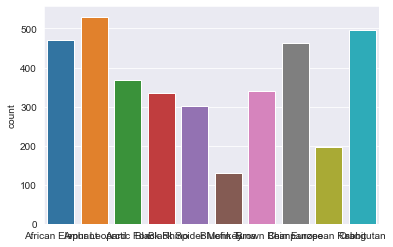

In [10]:
l = []
for i in train:
    if(i[1] == 0):
        l.append('African Elephant')
    if(i[1] == 1):
        l.append('Amur Leopard')
    if(i[1] == 2):
        l.append('Arctic Fox')
    if(i[1] == 3):
        l.append('Black Rhino')
    if(i[1] == 4):
        l.append('Black Spider Monkey')    
    if(i[1] == 5):
        l.append('Bluefin Tuna')    
    if(i[1] == 6):
        l.append('Brown Bear')    
    if(i[1] == 7):
        l.append('Chimpanzee')    
    if(i[1] == 8):
        l.append('European Rabbit')    
    if(i[1] == 9):
        l.append('Orangutan')
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'African Elephant')

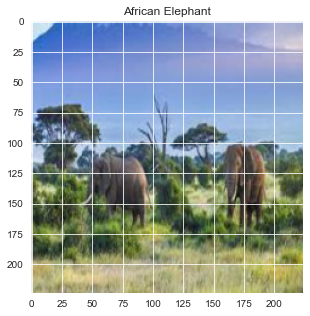

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(CATEGORIES[train[0][1]])

Text(0.5, 1.0, 'Orangutan')

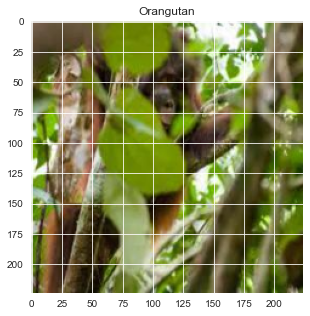

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(CATEGORIES[train[-1][1]])

In [14]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [15]:
y_train.shape

(3628,)

In [16]:
x_train.shape

(3628, 224, 224, 3)

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [18]:
x_train.shape

(3628, 224, 224, 3)

In [19]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

In [20]:
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())



In [21]:
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))



In [22]:
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [24]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs = 150 , validation_data = (x_val, y_val))

Epoch 1/150
114/114 [==============================] - 143s 1s/step - loss: 2.2853 - accuracy: 0.1529 - val_loss: 2.2972 - val_accuracy: 0.1000
Epoch 2/150
114/114 [==============================] - 141s 1s/step - loss: 2.2503 - accuracy: 0.1611 - val_loss: 2.2930 - val_accuracy: 0.1000
Epoch 3/150
114/114 [==============================] - 143s 1s/step - loss: 2.2287 - accuracy: 0.1599 - val_loss: 2.2896 - val_accuracy: 0.1000
Epoch 4/150
114/114 [==============================] - 141s 1s/step - loss: 2.2092 - accuracy: 0.1667 - val_loss: 2.2794 - val_accuracy: 0.1056
Epoch 5/150
114/114 [==============================] - 140s 1s/step - loss: 2.1945 - accuracy: 0.1744 - val_loss: 2.2638 - val_accuracy: 0.1389
Epoch 6/150
114/114 [==============================] - 150s 1s/step - loss: 2.1786 - accuracy: 0.1861 - val_loss: 2.2447 - val_accuracy: 0.1500
Epoch 7/150
114/114 [==============================] - 141s 1s/step - loss: 2.1624 - accuracy: 0.2126 - val_loss: 2.2182 - val_accuracy:

Epoch 57/150
114/114 [==============================] - 123s 1s/step - loss: 1.4936 - accuracy: 0.5101 - val_loss: 1.5155 - val_accuracy: 0.5056
Epoch 58/150
114/114 [==============================] - 115s 1s/step - loss: 1.4592 - accuracy: 0.5190 - val_loss: 1.5095 - val_accuracy: 0.5000
Epoch 59/150
114/114 [==============================] - 117s 1s/step - loss: 1.4736 - accuracy: 0.5036 - val_loss: 1.4956 - val_accuracy: 0.4889
Epoch 60/150
114/114 [==============================] - 135s 1s/step - loss: 1.4559 - accuracy: 0.5199 - val_loss: 1.5021 - val_accuracy: 0.5000
Epoch 61/150
114/114 [==============================] - 155s 1s/step - loss: 1.4455 - accuracy: 0.5370 - val_loss: 1.4912 - val_accuracy: 0.5056
Epoch 62/150
114/114 [==============================] - 155s 1s/step - loss: 1.4463 - accuracy: 0.5222 - val_loss: 1.4873 - val_accuracy: 0.5111
Epoch 63/150
114/114 [==============================] - 157s 1s/step - loss: 1.4426 - accuracy: 0.5302 - val_loss: 1.4729 - val_ac

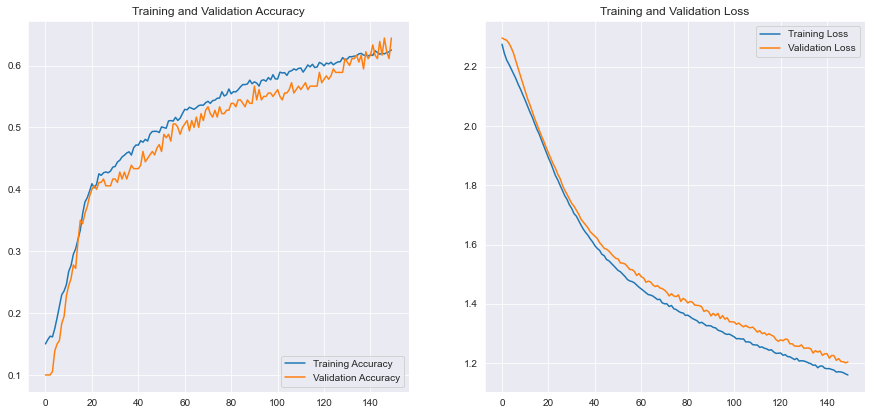

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

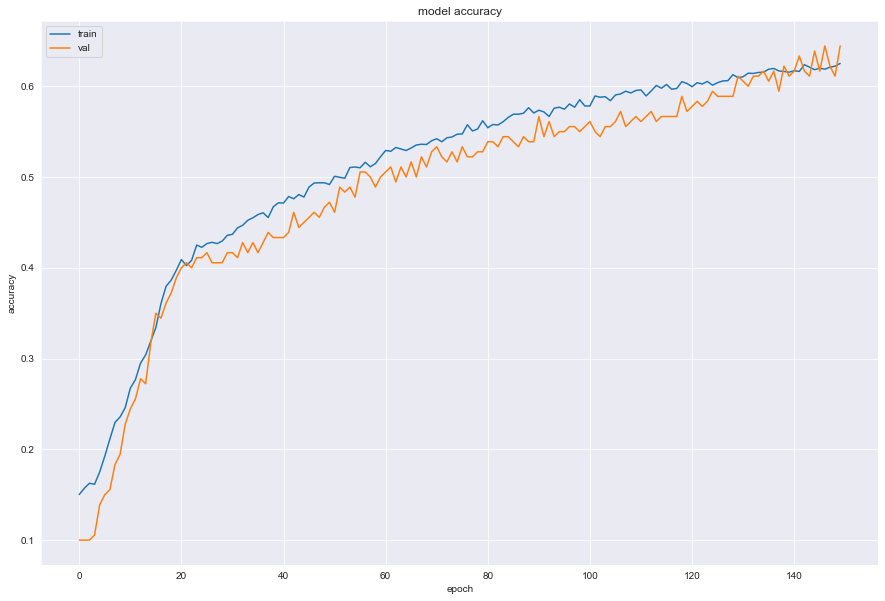

In [61]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

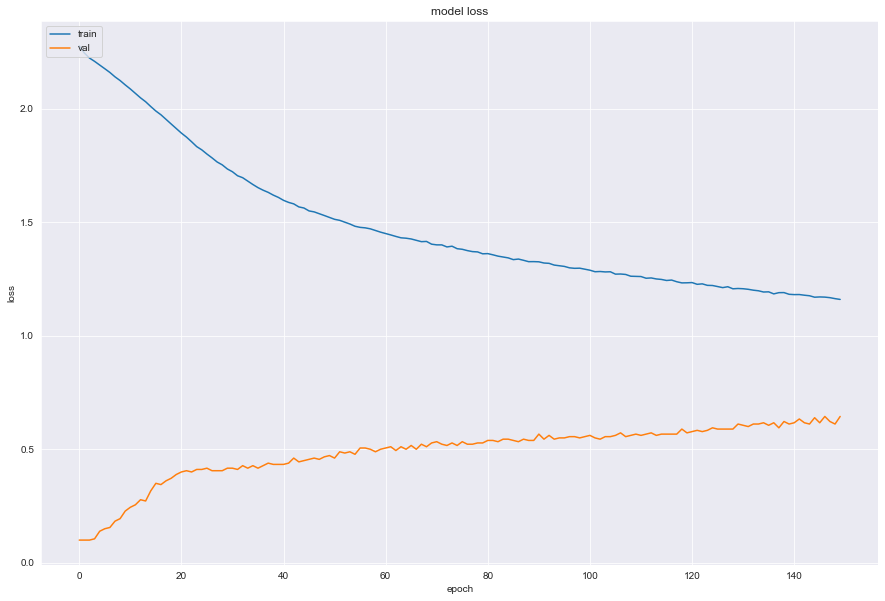

In [63]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

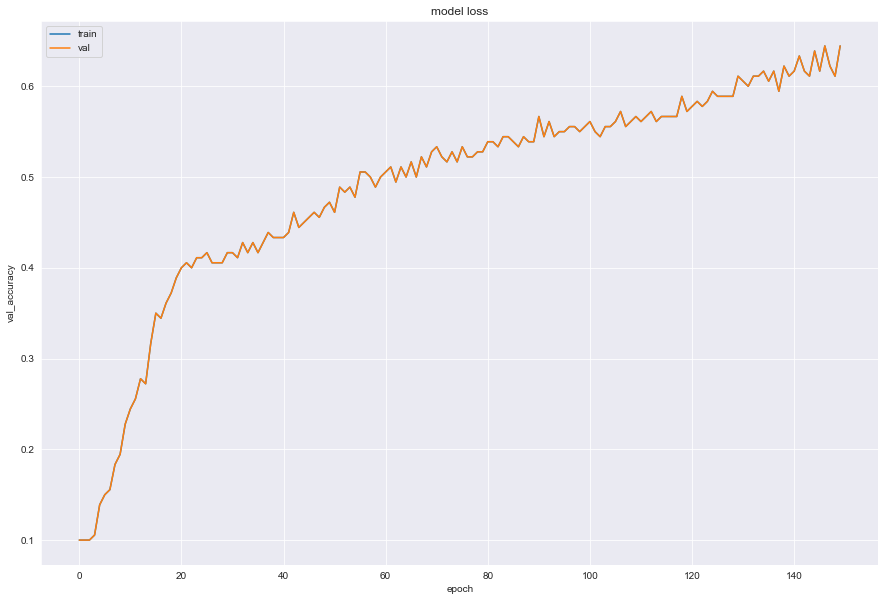

In [64]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

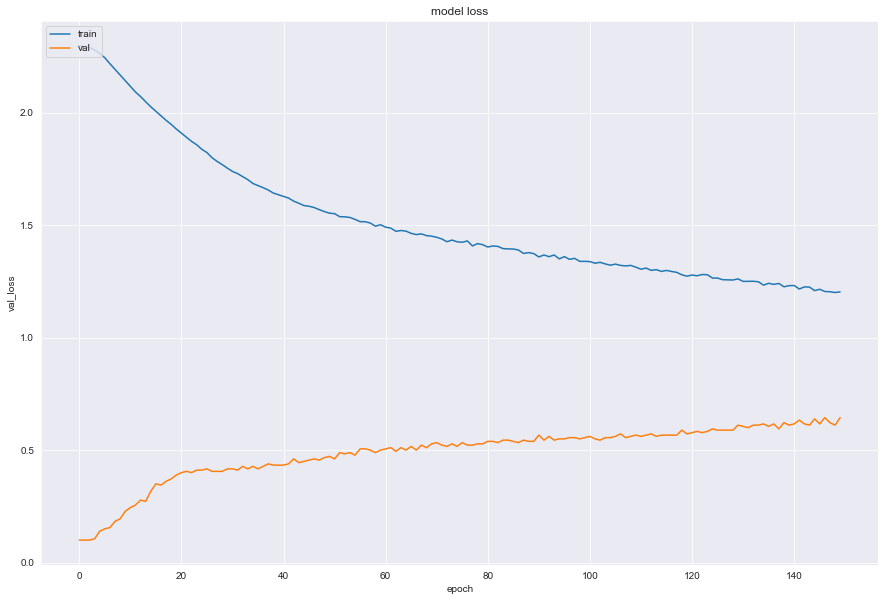

In [65]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['African Elephant (Class 0)','Amur Leopard (Class 1)','Arctic Fox (Class 2)','Black Rhino (Class 3)','Black Spider Monkey (Class 4)','Bluefin Tuna (Class 5)','Brown Bear (Class 6)','Chimpanzee (Class 7)','European Rabbit (Class 8)','Orangutan (Class 9)']))

C:\Users\zeewo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                               precision    recall  f1-score   support

   African Elephant (Class 0)       0.60      0.83      0.70        18
       Amur Leopard (Class 1)       0.68      0.94      0.79        18
         Arctic Fox (Class 2)       0.62      0.89      0.73        18
        Black Rhino (Class 3)       0.69      0.50      0.58        18
Black Spider Monkey (Class 4)       0.58      0.39      0.47        18
       Bluefin Tuna (Class 5)       0.94      0.83      0.88        18
         Brown Bear (Class 6)       0.62      0.56      0.59        18
         Chimpanzee (Class 7)       0.61      0.61      0.61        18
    European Rabbit (Class 8)       0.71      0.28      0.40        18
          Orangutan (Class 9)       0.50      0.61      0.55        18

                     accuracy                           0.64       180
                    macro avg       0.66      0.64      0.63       180
                 weighted avg       0.66      0.64      0.63       180



In [29]:
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

114/114 - 24s - loss: 1.1429 - accuracy: 0.6370
Untrained model, accuracy: 63.70%


In [30]:
!mkdir -p saved_model
model.save('saved_model_150_epoch/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model_150_epoch/my_model\assets


In [31]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

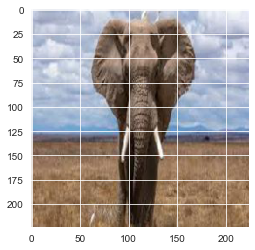

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


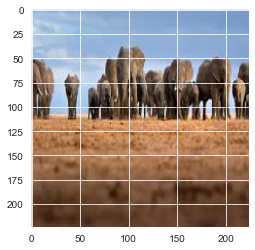

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


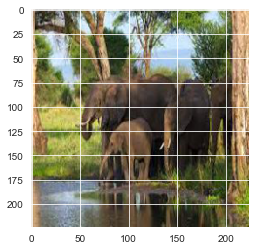

African Elephant
[[9.9998868e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.1383187e-05 0.0000000e+00 1.6391101e-35]]


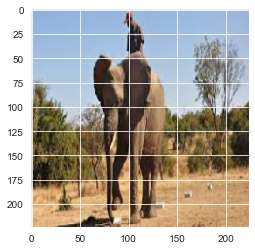

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


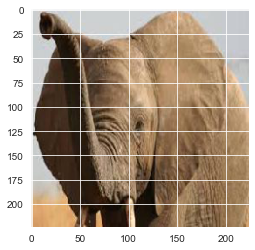

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


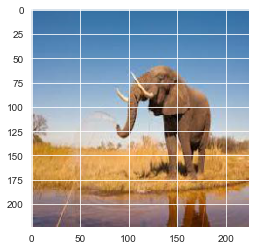

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


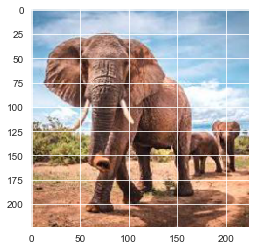

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


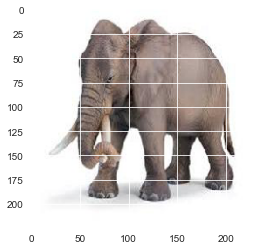

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


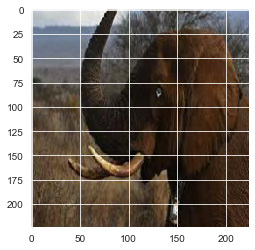

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


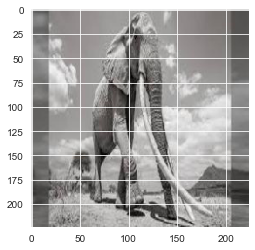

Arctic Fox
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


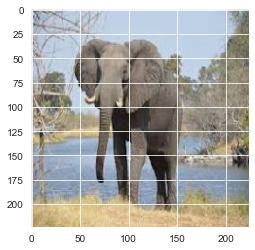

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


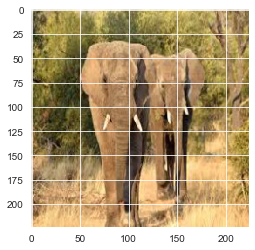

Black Rhino
[[0.3480909  0.         0.         0.65190905 0.         0.
  0.         0.         0.         0.        ]]


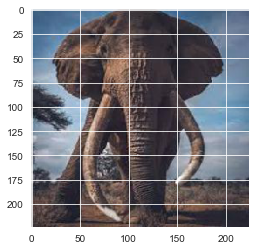

Amur Leopard
[[7.169438e-12 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


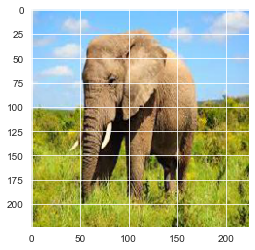

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


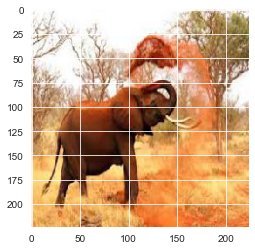

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


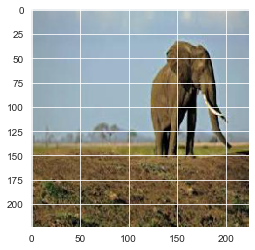

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


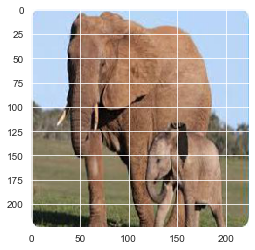

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


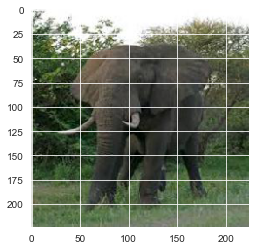

African Elephant
[[9.998541e-01 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.459423e-04 0.000000e+00 0.000000e+00]]


In [33]:
#test_from_prepared_model

dir_path = r'F:\programme\Animal species recognition\testdata\test_dataset\African Elephant'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(img_size,img_size,3))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val = model.predict(images)
    pred_name = CATEGORIES[np.argmax(val)]
    print(pred_name)
    print(val)

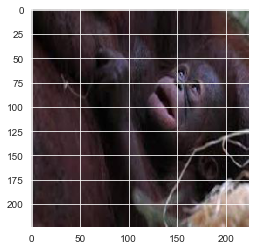

Black Rhino
[[0.0000000e+00 0.0000000e+00 1.7733152e-27 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.9923367e-30 0.0000000e+00 0.0000000e+00 8.2336683e-28]]


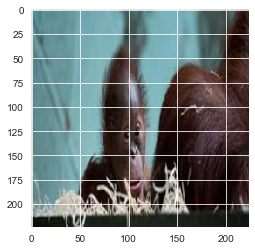

Arctic Fox
[[1.3708102e-05 0.0000000e+00 9.9998629e-01 5.2534326e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


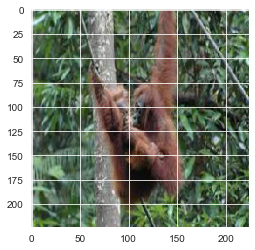

Orangutan
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.6600144e-32 5.4343952e-09 0.0000000e+00 1.0000000e+00]]


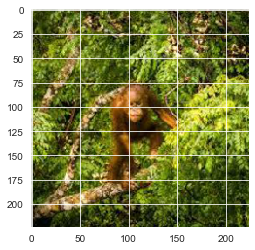

Orangutan
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


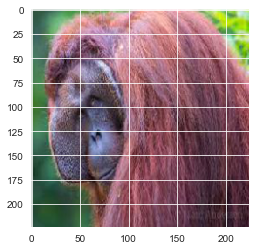

African Elephant
[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.666807e-23]]


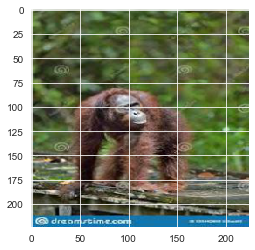

Orangutan
[[0.0000000e+00 3.1366468e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.2568308e-32 0.0000000e+00 1.8783317e-27 1.0000000e+00]]


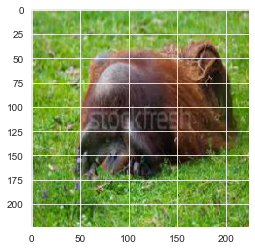

Chimpanzee
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.9558853e-36]]


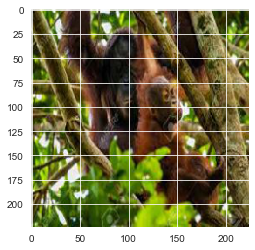

Orangutan
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


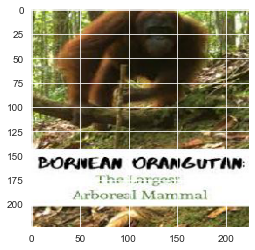

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


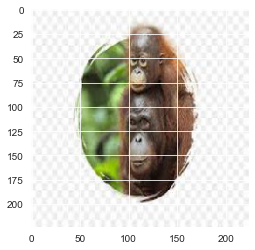

African Elephant
[[1.0000000e+00 0.0000000e+00 1.4371748e-21 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


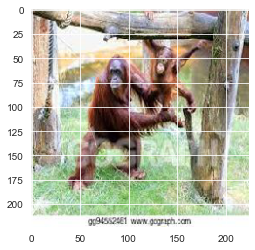

Amur Leopard
[[5.7963895e-10 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 7.4407109e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


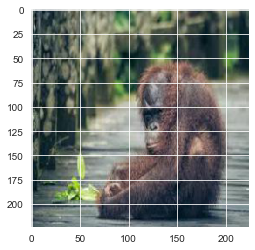

Arctic Fox
[[0.0000000e+00 3.7144248e-18 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


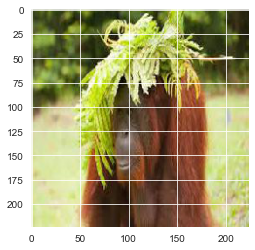

Orangutan
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


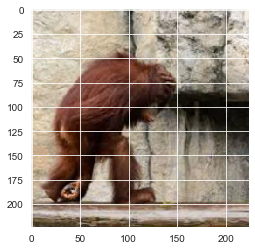

African Elephant
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


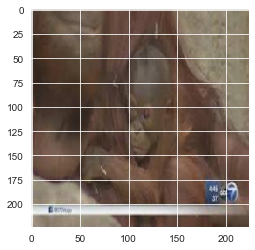

African Elephant
[[1.00000000e+00 0.00000000e+00 4.45288147e-11 1.08383746e-10
  0.00000000e+00 0.00000000e+00 7.34484699e-31 0.00000000e+00
  0.00000000e+00 5.07424137e-28]]


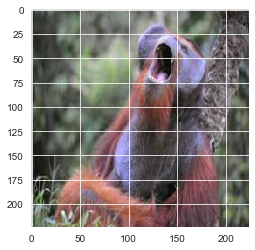

Arctic Fox
[[2.9303334e-13 0.0000000e+00 1.0000000e+00 2.9189501e-08 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


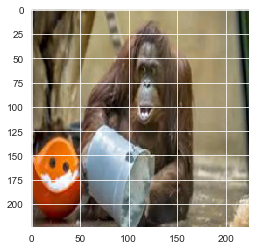

Black Rhino
[[0.12577839 0.         0.         0.87422156 0.         0.
  0.         0.         0.         0.        ]]


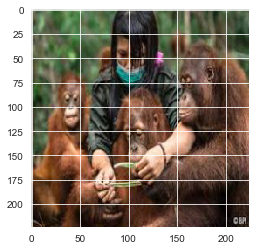

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
#test_from_prepared_model
dir_path = r'F:\programme\Animal species recognition\testdata\test_dataset\Orangutan'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(img_size,img_size,3))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val = new_model.predict(images)
    pred_name = CATEGORIES[np.argmax(val)]
    print(pred_name)
    print(val)

In [42]:
img = image.load_img(r'F:\programme\Animal species recognition\Major_project_keras\orang.jpg',target_size=(224,224,3)) #image read with resize
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

val = new_model.predict(images)
pred_name = CATEGORIES[np.argmax(val)]
print(pred_name)
print(val)


Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


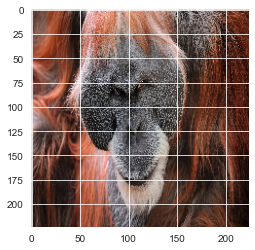

In [43]:
plt.imshow(img)

In [44]:
import sklearn.metrics as metrics

In [49]:
disp = metrics.plot_confusion_matrix(new_model, x_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

ValueError: plot_confusion_matrix only supports classifiers